# Imágenes binarias
## Introducción a OpenCV
###### _José Luis Garrido Labrador_

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('images/imbn05.jpg',0)

### Binarización

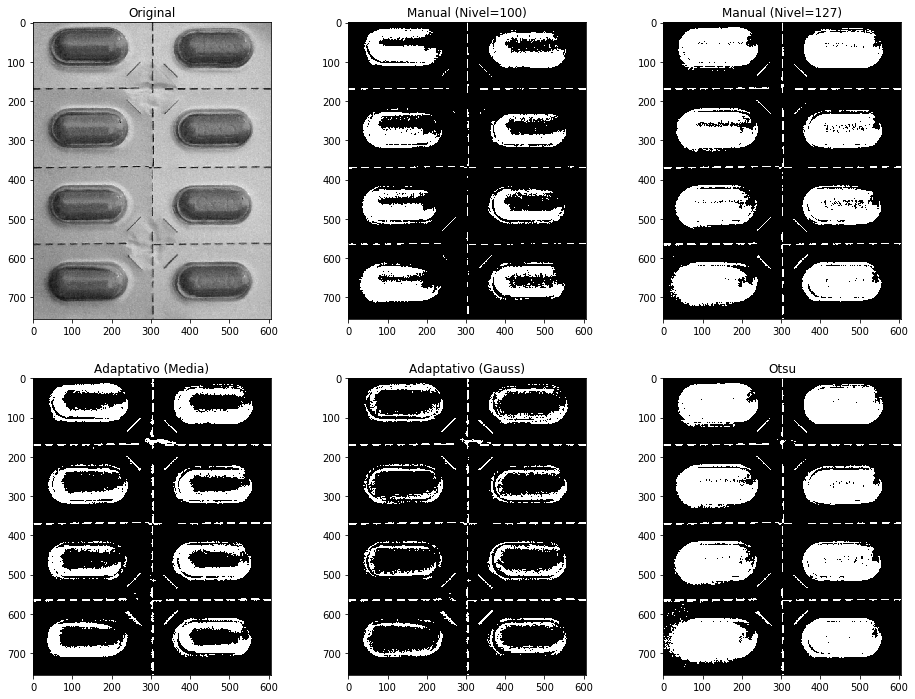

In [3]:
# Umbral manual
#img = cv2.GaussianBlur(img,(5,5),0)

imbn = np.copy(img)
imbn[imbn>100] = 255
imbn[imbn<=100] = 0
imbn = 1-imbn.astype('bool')

# Threshold manual
l,imbn2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

# Threshold adaptativo
imbnM = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,101,25)
imbnG = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,101,25)

# Threshold otsu
l,imbnO = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.figure(figsize=(16,12))

title = ['Original','Manual (Nivel=100)','Manual (Nivel=127)','Adaptativo (Media)','Adaptativo (Gauss)','Otsu']
imgs = [img, imbn, imbn2, imbnM, imbnG, imbnO]

for i in range(len(imgs)):
    plt.subplot(2,3,i+1)
    plt.imshow(imgs[i],cmap='gray')
    plt.title(title[i])


### Rellenado y contornos

Text(0.5, 1.0, 'Huecos rellenados')

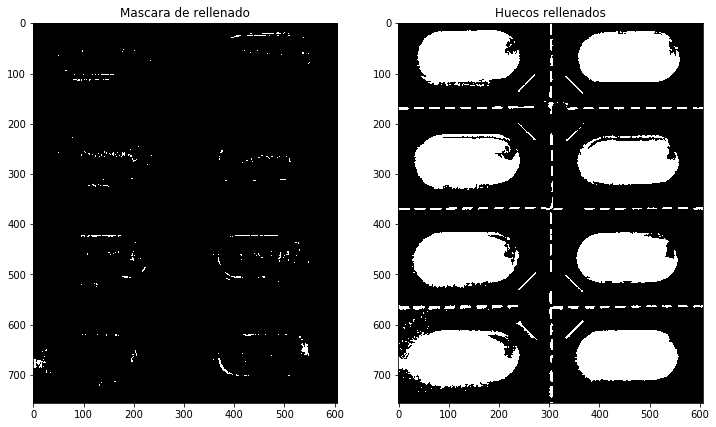

In [4]:
#Máscara
h, w = imbnO.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

#Rellenado
imbnF = imbnO.copy()

cv2.floodFill(imbnF,mask, (0,0), 255)
imbnI = cv2.bitwise_not(imbnF)
imbnHF = imbnO | imbnI

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(imbnI,cmap='gray')
plt.title('Mascara de rellenado')
plt.subplot(1,2,2)
plt.imshow(imbnHF,cmap='gray')
plt.title('Huecos rellenados')

Text(0.5, 1.0, 'Cany')

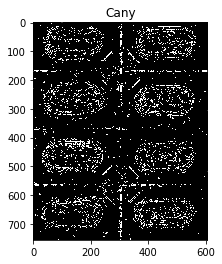

In [5]:
imbnCa = cv2.Canny(img,100,50)

plt.imshow(imbnCa,cmap='gray')
plt.title('Cany')

### Extracción de características

In [6]:
# Detección de contornos de los objetos (y por ende, cantidad de objetos)
im2, contours, hierarchy = cv2.findContours(imbnHF,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

print("Hay",len(contours),"objetos")

Hay 219 objetos


In [7]:
# Características de los objetos

obj = contours[0]

#Con funciones propias
x,y,w,h = cv2.boundingRect(obj) #Semejante a BoundingBox
area = cv2.contourArea(obj) #Semejante a Area
peri = cv2.arcLength(obj,True)

#Sin funciones propias
M = cv2.moments(obj)

#Semejante a Centroid
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
center = (cX,cY)


### Dibujado sobre imágenes
#### Rectángulos

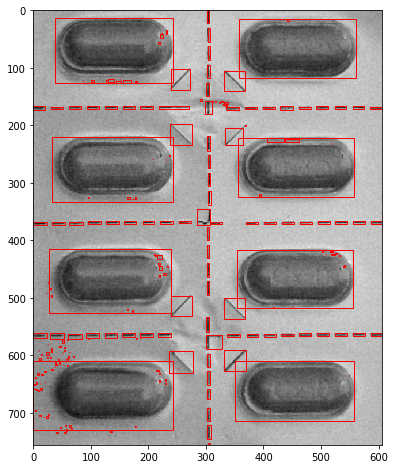

In [8]:
import matplotlib.patches as ptc

fig,ax = plt.subplots(1)
fig.set_size_inches(12,8)
ax.imshow(img,cmap='gray')

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    rect = ptc.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()

#### Texto

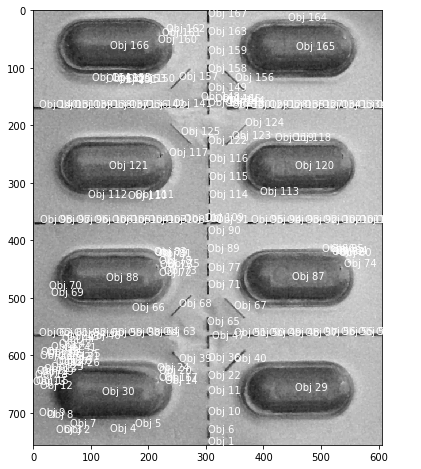

In [9]:
fig,ax = plt.subplots(1)
ax.imshow(img,cmap='gray')
fig.set_size_inches(12,8)

counter = 1
for c in contours:
    M = cv2.moments(c)
    try:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    except:
        continue
    
    plt.text(cX,cY,'Obj '+str(counter),color='w')
    counter +=1
    
plt.show()

### Operaciones morfológicas

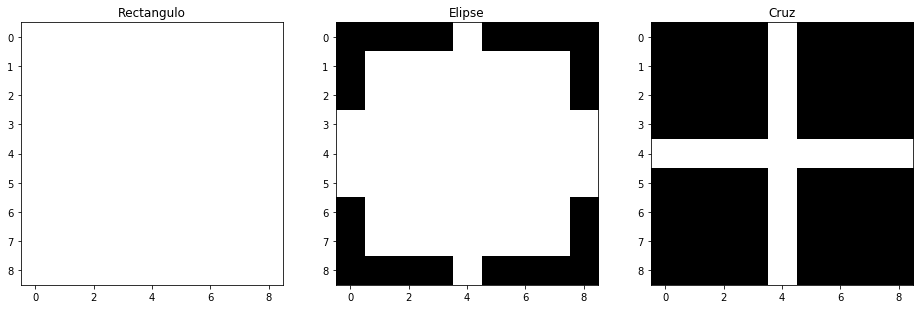

In [10]:
# Estructura
sr = cv2.getStructuringElement(cv2.MORPH_RECT,(9,9))
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
sc = cv2.getStructuringElement(cv2.MORPH_CROSS,(9,9))

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.title("Rectangulo")
plt.imshow(sr*255,cmap='gray',vmin=0)
plt.subplot(1,3,2)
plt.title("Elipse")
plt.imshow(se*255,cmap='gray')
plt.subplot(1,3,3)
plt.title("Cruz")
plt.imshow(sc*255,cmap='gray')

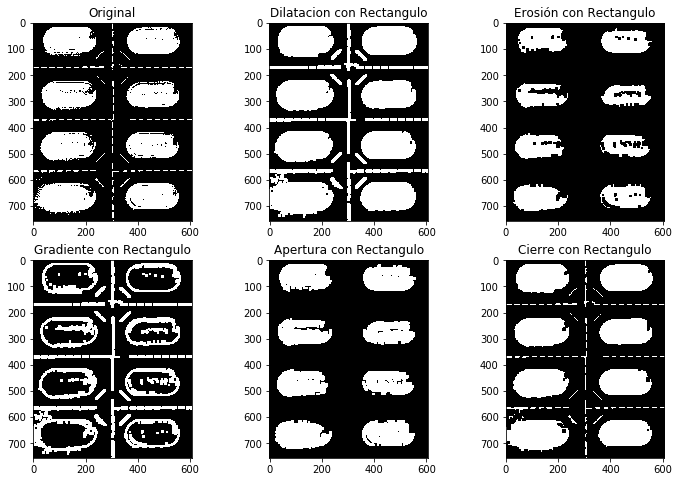

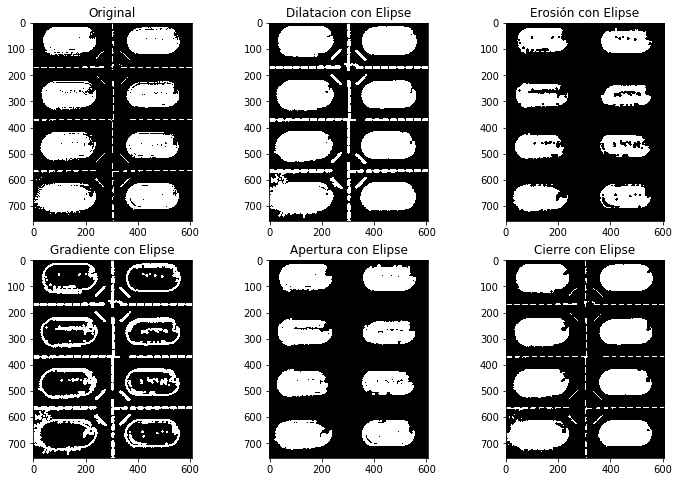

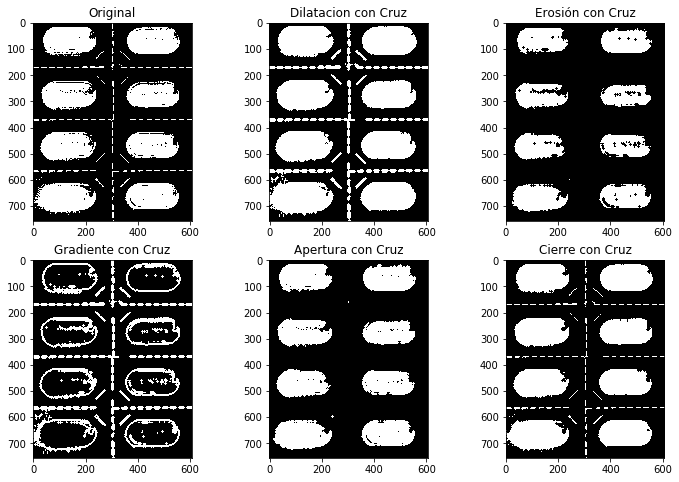

In [11]:
#Operaciones morfológicas

strel = (sr,se,sc)
strelT = ('Rectangulo','Elipse','Cruz')
imbnM = imbnO.copy()
for i in range(len(strel)):
    st = strel[i]
    ss = strelT[i]
    
    dil = cv2.dilate(imbnM,st,iterations = 1)
    ero = cv2.erode(imbnM,st,iterations = 1)
    
    gra = cv2.morphologyEx(imbnM,cv2.MORPH_GRADIENT,st)
    opn = cv2.morphologyEx(imbnM,cv2.MORPH_OPEN,st)
    clo = cv2.morphologyEx(imbnM,cv2.MORPH_CLOSE,st)
    
    
    mor = [imbnM,dil,ero,gra,opn,clo]
    tit = ['Original',
           'Dilatacion con '+strelT[i],
           'Erosión con '+strelT[i],
           'Gradiente con '+strelT[i],
           'Apertura con '+strelT[i],
           'Cierre con '+strelT[i]]
    
    plt.figure(figsize=(12,8))
    for j in range(len(tit)):
        plt.subplot(2,3,j+1)
        plt.title(tit[j])
        plt.imshow(mor[j],cmap='gray',vmin=0)
    
    